In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
df = pd.read_csv("listings.csv")

## 1. data preprocessing

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [41]:
df.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [42]:
cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', "price", "number_of_reviews", "room_type", "host_listings_count", 
        "review_scores_location", "review_scores_rating", "minimum_nights", "guests_included", "property_type", "amenities"]

In [43]:
df_1 = df[cols]

In [44]:
df_1[["price", "amenities"]]

,price,amenities
0,$85.00,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,$150.00,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,$975.00,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,$100.00,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,$450.00,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
...,...,...
3813,$359.00,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3814,$79.00,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
3815,$93.00,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ..."
3816,$99.00,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."


In [6]:
df_1.head(10)

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,room_type,host_listings_count,review_scores_location,review_scores_rating,minimum_nights,guests_included,property_type,amenities
0,4,1.0,1.0,1.0,$85.00,207,Entire home/apt,3.0,9.0,95.0,1,2,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,4,1.0,1.0,1.0,$150.00,43,Entire home/apt,6.0,10.0,96.0,2,1,Apartment,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,11,4.5,5.0,7.0,$975.00,20,Entire home/apt,2.0,10.0,97.0,4,10,House,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,3,1.0,0.0,2.0,$100.00,0,Entire home/apt,1.0,NaN,NaN,1,1,Apartment,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,6,2.0,3.0,3.0,$450.00,38,Entire home/apt,2.0,9.0,92.0,1,6,House,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
5,2,1.0,1.0,1.0,$120.00,17,Private room,1.0,10.0,95.0,1,1,House,"{""Wireless Internet"",""Free Parking on Premises..."
6,2,1.0,1.0,1.0,$80.00,58,Private room,1.0,10.0,99.0,3,1,House,"{""Wireless Internet"",""Free Parking on Premises..."
7,2,1.0,1.0,1.0,$60.00,173,Private room,5.0,9.0,97.0,2,1,Cabin,"{""Wireless Internet"",""Pets live on this proper..."
8,2,1.0,1.0,1.0,$90.00,8,Private room,1.0,10.0,97.0,3,1,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
9,4,1.0,1.0,1.0,$150.00,32,Entire home/apt,6.0,10.0,97.0,2,1,Apartment,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."


In [7]:
df_1.isnull().sum()

accommodates                0
bathrooms                  16
bedrooms                    6
beds                        1
price                       0
number_of_reviews           0
room_type                   0
host_listings_count         2
review_scores_location    655
review_scores_rating      647
minimum_nights              0
guests_included             0
property_type               1
amenities                   0
dtype: int64

In [8]:
df_1

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,room_type,host_listings_count,review_scores_location,review_scores_rating,minimum_nights,guests_included,property_type,amenities
0,4,1.0,1.0,1.0,$85.00,207,Entire home/apt,3.0,9.0,95.0,1,2,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,4,1.0,1.0,1.0,$150.00,43,Entire home/apt,6.0,10.0,96.0,2,1,Apartment,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,11,4.5,5.0,7.0,$975.00,20,Entire home/apt,2.0,10.0,97.0,4,10,House,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,3,1.0,0.0,2.0,$100.00,0,Entire home/apt,1.0,NaN,NaN,1,1,Apartment,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,6,2.0,3.0,3.0,$450.00,38,Entire home/apt,2.0,9.0,92.0,1,6,House,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,6,2.0,3.0,3.0,$359.00,1,Entire home/apt,354.0,10.0,80.0,3,1,House,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3814,4,1.0,1.0,2.0,$79.00,2,Entire home/apt,1.0,10.0,100.0,2,3,Apartment,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
3815,2,1.0,1.0,1.0,$93.00,0,Entire home/apt,1.0,NaN,NaN,1,2,House,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ..."
3816,2,1.0,0.0,1.0,$99.00,0,Entire home/apt,1.0,NaN,NaN,3,1,Condominium,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."


In [9]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val


def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''

    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0

    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)

    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)

    return

split_list_into_columns(df_1, "amenities")

<ipython-input-9-d1630133af00>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)


In [10]:
df_1["price"] = df_1["price"].apply(lambda x : float(x.replace("$", "").replace(",", "")))

<ipython-input-10-fc68528b2a66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["price"] = df_1["price"].apply(lambda x : float(x.replace("$", "").replace(",", "")))


In [11]:
#assign different prices to different price ranges
def priceCat(x):
    if x>=0 and x<=75:
        return 0
    elif x>=76 and x<=120:
        return 1
    elif x>=121 and x<=200:
        return 2
    elif x >= 201 and x<= 300:
        return 3
    elif x>=301:
        return 4
    else:
        return np.nan
    
df_1["price"] = df_1["price"].apply(priceCat)

<ipython-input-11-559b53ec8631>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["price"] = df_1["price"].apply(priceCat)


In [12]:
df_1.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'number_of_reviews', 'room_type', 'host_listings_count',
       'review_scores_location', 'review_scores_rating', 'minimum_nights',
       'guests_included', 'property_type', 'amenities',
       'amenities_Wireless Internet', 'amenities_Heating', 'amenities_Kitchen',
       'amenities_Smoke Detector', 'amenities_Essentials', 'amenities_Dryer',
       'amenities_Washer', 'amenities_Internet', 'amenities_Shampoo',
       'amenities_TV'],
      dtype='object')

In [13]:
df_1.head(40)

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,room_type,host_listings_count,review_scores_location,review_scores_rating,...,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
0,4,1.0,1.0,1.0,1,207,Entire home/apt,3.0,9.0,95.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,4,1.0,1.0,1.0,2,43,Entire home/apt,6.0,10.0,96.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,11,4.5,5.0,7.0,4,20,Entire home/apt,2.0,10.0,97.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,1.0,0.0,2.0,1,0,Entire home/apt,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,6,2.0,3.0,3.0,4,38,Entire home/apt,2.0,9.0,92.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
5,2,1.0,1.0,1.0,1,17,Private room,1.0,10.0,95.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6,2,1.0,1.0,1.0,1,58,Private room,1.0,10.0,99.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,2,1.0,1.0,1.0,0,173,Private room,5.0,9.0,97.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,2,1.0,1.0,1.0,1,8,Private room,1.0,10.0,97.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,4,1.0,1.0,1.0,2,32,Entire home/apt,6.0,10.0,97.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [14]:
#select specific dtypes to numericList and categoricalList such that we can put two lists into pipeline
numericList = list(df_1.select_dtypes(["int64", "float64"]).columns)
categoricalList = list(df_1.select_dtypes("object").columns)

In [15]:
numericList

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'number_of_reviews',
 'host_listings_count',
 'review_scores_location',
 'review_scores_rating',
 'minimum_nights',
 'guests_included',
 'amenities_Wireless Internet',
 'amenities_Heating',
 'amenities_Kitchen',
 'amenities_Smoke Detector',
 'amenities_Essentials',
 'amenities_Dryer',
 'amenities_Washer',
 'amenities_Internet',
 'amenities_Shampoo',
 'amenities_TV']

In [16]:
categoricalList

['room_type', 'property_type', 'amenities']

## 2. Data analysis

In [17]:
df_1.describe()

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,host_listings_count,review_scores_location,review_scores_rating,minimum_nights,...,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
count,3818.000000,3802.000000,3812.000000,3817.000000,3818.00000,3818.000000,3816.000000,3163.000000,3171.000000,3818.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,3.349398,1.259469,1.307712,1.735394,1.27318,22.223415,7.157757,9.608916,94.539262,2.369303,...,0.960450,0.949974,0.896543,0.859350,0.847826,0.784966,0.783656,0.736249,0.699319,0.674175
std,1.977599,0.590369,0.883395,1.139480,1.07220,37.730892,28.628149,0.629053,6.606083,16.305902,...,0.194924,0.218028,0.304595,0.347705,0.359236,0.410900,0.411805,0.440723,0.458614,0.468744
min,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,4.000000,20.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.00000,2.000000,1.000000,9.000000,93.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,1.000000,1.00000,9.000000,1.000000,10.000000,96.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,2.000000,2.000000,2.00000,26.000000,3.000000,10.000000,99.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,7.000000,15.000000,4.00000,474.000000,502.000000,10.000000,100.000000,1000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_1.shape

(3818, 24)

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 3818 non-null   int64  
 1   bathrooms                    3802 non-null   float64
 2   bedrooms                     3812 non-null   float64
 3   beds                         3817 non-null   float64
 4   price                        3818 non-null   int64  
 5   number_of_reviews            3818 non-null   int64  
 6   room_type                    3818 non-null   object 
 7   host_listings_count          3816 non-null   float64
 8   review_scores_location       3163 non-null   float64
 9   review_scores_rating         3171 non-null   float64
 10  minimum_nights               3818 non-null   int64  
 11  guests_included              3818 non-null   int64  
 12  property_type                3817 non-null   object 
 13  amenities         

<AxesSubplot:>

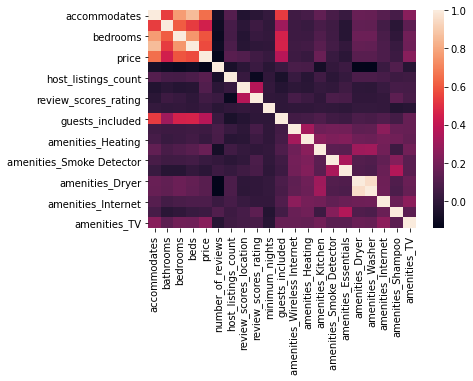

In [20]:
sns.heatmap(df_1.corr())

## 3. machine learning

In [21]:
X = df_1.drop(columns=["price"], axis=1)
y = df_1["price"]

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [23]:
numericList.remove("price")

In [24]:
numericList

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'host_listings_count',
 'review_scores_location',
 'review_scores_rating',
 'minimum_nights',
 'guests_included',
 'amenities_Wireless Internet',
 'amenities_Heating',
 'amenities_Kitchen',
 'amenities_Smoke Detector',
 'amenities_Essentials',
 'amenities_Dryer',
 'amenities_Washer',
 'amenities_Internet',
 'amenities_Shampoo',
 'amenities_TV']

In [25]:
# add two lists into a pipeline (inputer and OneHotEncoder)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
transformers= [
    ("num", numeric_transformer, numericList),
    ("cat", categorical_transformer, categoricalList)
])

In [26]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [27]:
def function(n):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
        ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])

    preprocessor = ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, numericList),
        ("cat", categorical_transformer, categoricalList)
    ])

    clf= Pipeline(steps=[("preprocessor", preprocessor),
                            ("RF", RandomForestClassifier(n_estimators=n, 
                                   random_state=42, 
                                   n_jobs=-1))
                            ] )

    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
#     pred = np.array(map(priceCat, pred))
    print(f"This is n: {n}")
    print((pred == y_test).sum() / len(y_test))

    print("model Test score: %.3f" % clf.score(X_test, y_test))
    
    return clf.score(X_test, y_test)

In [28]:
#increase n_estimators from 1 to 200 by 5 increment
scores = []


for i in range(1, 200, 5):
    score = function(i)
    scores.append(score)

This is n: 1
0.4397905759162304
model Test score: 0.440
This is n: 6
0.5615183246073299
model Test score: 0.562
This is n: 11
0.574607329842932
model Test score: 0.575
This is n: 16
0.5903141361256544
model Test score: 0.590
This is n: 21
0.5890052356020943
model Test score: 0.589
This is n: 26
0.6034031413612565
model Test score: 0.603
This is n: 31
0.5903141361256544
model Test score: 0.590
This is n: 36
0.5929319371727748
model Test score: 0.593
This is n: 41
0.5968586387434555
model Test score: 0.597
This is n: 46
0.599476439790576
model Test score: 0.599
This is n: 51
0.5981675392670157
model Test score: 0.598
This is n: 56
0.6020942408376964
model Test score: 0.602
This is n: 61
0.5968586387434555
model Test score: 0.597
This is n: 66
0.606020942408377
model Test score: 0.606
This is n: 71
0.6086387434554974
model Test score: 0.609
This is n: 76
0.612565445026178
model Test score: 0.613
This is n: 81
0.612565445026178
model Test score: 0.613
This is n: 86
0.6138743455497382
model

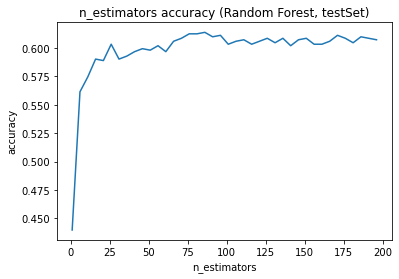

In [29]:
plt.plot(np.arange(1, 200, 5), np.array(scores))
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("n_estimators accuracy (Random Forest, testSet)")
plt.show()

In [30]:
#select best n_estimators
bestScore = scores.index(max(scores))

In [31]:
def function1(n):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
        ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])

    preprocessor = ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, numericList),
        ("cat", categorical_transformer, categoricalList)
    ])

    clf= Pipeline(steps=[("preprocessor", preprocessor),
                            ("RF", RandomForestClassifier(n_estimators=n, 
                                   random_state=42, 
                                   n_jobs=-1))
                            ] )

    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
#     pred = np.array(map(priceCat, pred))
    print(f"This is n: {n}")
    print((pred == y_test).sum() / len(y_test))

    print("model Test score: %.3f" % clf.score(X_test, y_test))
    
    return pred

In [32]:
pred = function1(1 + 5*bestScore)

This is n: 86
0.6138743455497382
model Test score: 0.614


<AxesSubplot:>

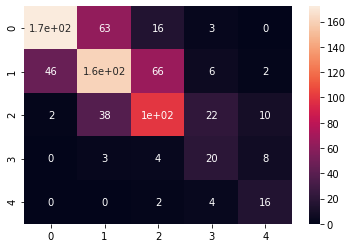

In [33]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True)

In [34]:
def function2(n):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
        ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ])

    preprocessor = ColumnTransformer(
    transformers= [
        ("num", numeric_transformer, numericList),
        ("cat", categorical_transformer, categoricalList)
    ])

    clf= Pipeline(steps=[("preprocessor", preprocessor),
                            ("RF", RandomForestClassifier(n_estimators=n, 
                                   random_state=42, 
                                   n_jobs=-1))
                            ] )

    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
#     pred = np.array(map(priceCat, pred))
    print(f"This is n: {n}")
    print((pred == y_test).sum() / len(y_test))

    print("model Test score: %.3f" % clf.score(X_train, y_train))
    
    return clf.score(X_train, y_train)

In [35]:
scores_train = []


for i in range(1, 200, 5):
    score = function2(i)
    scores_train.append(score)

This is n: 1
0.4397905759162304
model Test score: 0.805
This is n: 6
0.5615183246073299
model Test score: 0.954
This is n: 11
0.574607329842932
model Test score: 0.986
This is n: 16
0.5903141361256544
model Test score: 0.993
This is n: 21
0.5890052356020943
model Test score: 0.997
This is n: 26
0.6034031413612565
model Test score: 0.998
This is n: 31
0.5903141361256544
model Test score: 0.999
This is n: 36
0.5929319371727748
model Test score: 0.999
This is n: 41
0.5968586387434555
model Test score: 0.999
This is n: 46
0.599476439790576
model Test score: 0.999
This is n: 51
0.5981675392670157
model Test score: 0.999
This is n: 56
0.6020942408376964
model Test score: 0.999
This is n: 61
0.5968586387434555
model Test score: 0.999
This is n: 66
0.606020942408377
model Test score: 0.999
This is n: 71
0.6086387434554974
model Test score: 0.999
This is n: 76
0.612565445026178
model Test score: 0.999
This is n: 81
0.612565445026178
model Test score: 0.999
This is n: 86
0.6138743455497382
model

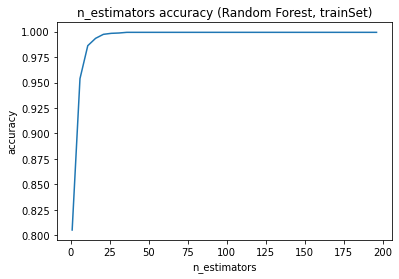

In [36]:
plt.plot(np.arange(1, 200, 5), np.array(scores_train))
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("n_estimators accuracy (Random Forest, trainSet)")
plt.show()